# Batch Normalization 

Batch normalization was introduced in Sergey Ioffe's and Christian Szegedy's 2015 paper [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167.pdf). The idea is that, instead of just normalizing the inputs to the network, we normalize the inputs to _layers within_ the network. 
> It's called **batch** normalization because during training, we normalize each layer's inputs by using the mean and variance of the values in the current *batch*.

# Batch Normalization – Lesson

1. [What is it?](#theory)
2. [What are it's benefits?](#benefits)
3. [How do we add it to a network?](#implementation_1)
4. [Let's see it work!](#demos)
5. [What are you hiding?](#implementation_2)

# What is Batch Normalization?<a id='theory'></a>

Batch normalization was introduced in Sergey Ioffe's and Christian Szegedy's 2015 paper [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167.pdf). The idea is that, instead of just normalizing the inputs to the network, we normalize the inputs to _layers within_ the network. It's called "batch" normalization because during training, we normalize each layer's inputs by using the mean and variance of the values in the current mini-batch.

Why might this help? Well, we know that normalizing the inputs to a _network_ helps the network learn. But a network is a series of layers, where the output of one layer becomes the input to another. That means we can think of any layer in a neural network as the _first_ layer of a smaller network.

For example, imagine a 3 layer network. Instead of just thinking of it as a single network with inputs, layers, and outputs, think of the output of layer 1 as the input to a two layer network. This two layer network would consist of layers 2 and 3 in our original network. 

Likewise, the output of layer 2 can be thought of as the input to a single layer network, consisting only of layer 3.

When you think of it like that - as a series of neural networks feeding into each other - then it's easy to imagine how normalizing the inputs to each layer would help. It's just like normalizing the inputs to any other neural network, but you're doing it at every layer (sub-network).

Beyond the intuitive reasons, there are good mathematical reasons why it helps the network learn better, too. It helps combat what the authors call _internal covariate shift_. This discussion is best handled [in the paper](https://arxiv.org/pdf/1502.03167.pdf) and in [Deep Learning](http://www.deeplearningbook.org) a book you can read online written by Ian Goodfellow, Yoshua Bengio, and Aaron Courville. Specifically, check out the batch normalization section of [Chapter 8: Optimization for Training Deep Models](http://www.deeplearningbook.org/contents/optimization.html).


![batch_norm](./images/lecture1.png)
    
# Benefits of Batch Normalization<a id="benefits"></a>

Batch normalization optimizes network training. It has been shown to have several benefits:
1. **Networks train faster** – Each training _iteration_ will actually be slower because of the extra calculations during the forward pass and the additional hyperparameters to train during back propagation. However, it should converge much more quickly, so training should be faster overall. 
2. **Allows higher learning rates** – Gradient descent usually requires small learning rates for the network to converge. And as networks get deeper, their gradients get smaller during back propagation so they require even more iterations. Using batch normalization allows us to use much higher learning rates, which further increases the speed at which networks train. 
3. **Makes weights easier to initialize** – Weight initialization can be difficult, and it's even more difficult when creating deeper networks. Batch normalization seems to allow us to be much less careful about choosing our initial starting weights.  
4. **Makes more activation functions viable** – Some activation functions do not work well in some situations. Sigmoids lose their gradient pretty quickly, which means they can't be used in deep networks. And ReLUs often die out during training, where they stop learning completely, so we need to be careful about the range of values fed into them. Because batch normalization regulates the values going into each activation function, non-linearlities that don't seem to work well in deep networks actually become viable again.  
5. **Simplifies the creation of deeper networks** – Because of the first 4 items listed above, it is easier to build and faster to train deeper neural networks when using batch normalization. And it's been shown that deeper networks generally produce better results, so that's great.
6. **Provides a bit of regularlization** – Batch normalization adds a little noise to your network. In some cases, such as in Inception modules, batch normalization has been shown to work as well as dropout. But in general, consider batch normalization as a bit of extra regularization, possibly allowing you to reduce some of the dropout you might add to a network. 
7. **May give better results overall** – Some tests seem to show batch normalization actually improves the training results. However, it's really an optimization to help train faster, so you shouldn't think of it as a way to make your network better. But since it lets you train networks faster, that means you can iterate over more designs more quickly. It also lets you build deeper networks, which are usually better. So when you factor in everything, you're probably going to end up with better results if you build your networks with batch normalization.
    
    
![](./images/lecture3.png)
![](./images/lecture4.png)
![](./images/lecture5.png)

the snippet below shows that in case of fully connected layers, the mean and variance is calculated for each feature. number of features in each layer is equal to number of nuerons. For example if you have a FC layer MxN dimension. The output is N dimension, and there will be N means and variances. You need a batch of data to calculate the mean and variance across each feature N. This is because each training data givens you a single value for each N features in a FC layer. 
![](./images/lecture6.png)
![](./images/lecture7.png)

# Why Batch Norm Helps
covariate shift: if you train your models on black cats, but in test you see colored cats. Your covariates shift. 
Covriate shift can happen and propagate across the entire network layers. The Batch normalization ensures that no matter how much incoming values from a previous layer (including the very first input that goes into layer one in the cat example) prior to activation change, what enters the layer has mean and variance beta and gamma. 

in that sense each layer training becomes a bit more independent of what happened in previous layers, and this speeds up the training and accuracy. 

# Batch Normalization in Images/Tensors

based on the code below taken from [mx-net](https://gluon.mxnet.io/chapter04_convolutional-neural-networks/cnn-batch-norm-scratch.html) , the batch normalization in images and tensors is applied to each layer of the tensor. So it is not applied to to each pixel, rather the entire layer. So the very first RGB input image will have 3 means, 3 variance and 3 beta and 3 gamma if you add batch norm to it. The mean and variances are calculated across batches in training, and then the average mean and variances acorss batches is used during test and prediction to normalize the data. Beta and Gamma are estimated via backpropagation

In [36]:
import numpy as np
def pure_batch_norm(X, gamma, beta, eps = 1e-5):
    if len(X.shape) not in (2, 4):
        raise ValueError('only supports dense or 2dconv')

    # dense
    if len(X.shape) == 2:
        # mini-batch mean
        mean = np.mean(X, axis=0)
        print("mean shape:" , mean.shape)
        print("mean :", mean)
        # mini-batch variance
        variance = np.mean((X - mean) ** 2, axis=0)
        # normalize
        X_hat = (X - mean) * 1.0 / np.sqrt(variance + eps)
        # scale and shift
        out = gamma * X_hat + beta

    # 2d conv
    elif len(X.shape) == 4:
        # extract the dimensions
        N, C, H, W = X.shape
        # mini-batch mean
        mean = np.mean(X, axis=(0, 2, 3))
        print("mean shape:" , mean.shape)
        print("mean :", mean)
        # mini-batch variance
        variance = np.mean((X - mean.reshape((1, C, 1, 1))) ** 2, axis=(0, 2, 3))
        # normalize
        X_hat = (X - mean.reshape((1, C, 1, 1))) * 1.0 / np.sqrt(variance.reshape((1, C, 1, 1)) + eps)
        # scale and shift
        out = gamma.reshape((1, C, 1, 1)) * X_hat + beta.reshape((1, C, 1, 1))

    return out

### Fully Connected Layers 

In [42]:
#  N = 2 = batch size, D = 5 =  # of neurons in the layer, Assume shape of fully connected layer FC = K*D results
# in D output/features that will be normalized and then fed into activation of that layer 
# and then into the next layer
B = np.array(range(10*5)).reshape((10,5)) 
print("shape of input" , B.shape)
output = pure_batch_norm(B, np.array([1,1, 1, 1, 1]), np.array([0,0, 0, 0 , 0]), eps = 1e-5)

shape of input (10, 5)
mean shape: (5,)
mean : [22.5 23.5 24.5 25.5 26.5]


### Tensors and Images Batch normalization

In [41]:
#  N = 2 = batch size, C = 3 = channels, H = 2 = image height, W = 4 = image width 
B = np.array(range(2*3*2*4)).reshape((2,3,2,4)) 
print("shape of input" , B.shape)
output = pure_batch_norm(B, np.array([1,1, 1]), np.array([0,0, 0]), eps = 1e-5)

shape of input (2, 3, 2, 4)
mean shape: (3,)
mean : [15.5 23.5 31.5]


## Batch Normalization in PyTorch<a id="implementation_1"></a>

This section of the notebook shows you one way to add batch normalization to a neural network built in PyTorch. 

The following cells import the packages we need in the notebook and load the MNIST dataset to use in our experiments.

In [1]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 64

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# get the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                            download=True, transform=transform)

test_data = datasets.MNIST(root='data', train=False,
                           download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers)

Processing...
Done!


### Visualize the data

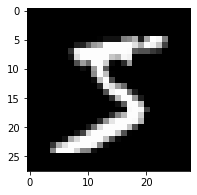

In [10]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize = (3,3)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

## Neural network classes for testing

The following class, `NeuralNet`, allows us to create identical neural networks **with and without batch normalization** to compare. The code is heavily documented, but there is also some additional discussion later. You do not need to read through it all before going through the rest of the notebook, but the comments within the code blocks may answer some of your questions.

*About the code:*
>We are defining a simple MLP for classification; this design choice was made to support the discussion related to batch normalization and not to get the best classification accuracy.

### (Important) Model Details

There are quite a few comments in the code, so those should answer most of your questions. However, let's take a look at the most important lines.

We add batch normalization to layers inside the `__init__` function. Here are some important points about that code:
1. Layers with batch normalization do **not** include a bias term.
2. We use PyTorch's [BatchNorm1d](https://pytorch.org/docs/stable/nn.html#batchnorm1d) function to handle the math. This is the function you use to operate on linear layer outputs; you'll use [BatchNorm2d](https://pytorch.org/docs/stable/nn.html#batchnorm2d) for 2D outputs like filtered images from convolutional layers. 
3. We add the batch normalization layer **before** calling the activation function.


In [43]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self, use_batch_norm, input_size=784, hidden_dim=256, output_size=10):
        """
        Creates a PyTorch net using the given parameters.
        
        :param use_batch_norm: bool
            Pass True to create a network that uses batch normalization; False otherwise
            Note: this network will not use batch normalization on layers that do not have an
            activation function.
        """
        super(NeuralNet, self).__init__() # init super
        
        # Default layer sizes
        self.input_size = input_size # (28*28 images)
        self.hidden_dim = hidden_dim
        self.output_size = output_size # (number of classes)
        # Keep track of whether or not this network uses batch normalization.
        self.use_batch_norm = use_batch_norm
        
        # define hidden linear layers, with optional batch norm on their outputs
        # layers with batch_norm applied have no bias term
        if use_batch_norm:
            self.fc1 = nn.Linear(input_size, hidden_dim*2, bias=False)
            # input to batch norm = num_features = C, which is from an expected input of size (N,C)
            self.batch_norm1 = nn.BatchNorm1d(hidden_dim*2)
        else:
            self.fc1 = nn.Linear(input_size, hidden_dim*2)
            
        # define *second* hidden linear layers, with optional batch norm on their outputs
        if use_batch_norm:
            self.fc2 = nn.Linear(hidden_dim*2, hidden_dim, bias=False)
            self.batch_norm2 = nn.BatchNorm1d(hidden_dim)
        else:
            self.fc2 = nn.Linear(hidden_dim*2, hidden_dim)
        
        # third and final, fully-connected layer
        self.fc3 = nn.Linear(hidden_dim, output_size)
        
        
    def forward(self, x):
        # flatten image
        x = x.view(-1, 28*28)
        # all hidden layers + optional batch norm + relu activation
        x = self.fc1(x)
        if self.use_batch_norm:
            x = self.batch_norm1(x)
        x = F.relu(x)
        # second layer
        x = self.fc2(x)
        if self.use_batch_norm:
            x = self.batch_norm2(x)
        x = F.relu(x)
        # third layer, no batch norm or activation
        x = self.fc3(x)
        return x


### Create two different models for testing

* `net_batchnorm` is a linear classification model **with** batch normalization applied to the output of its hidden layers
* `net_no_norm` is a plain MLP, without batch normalization

Besides the normalization layers, everthing about these models is the same.

In [44]:
net_batchnorm = NeuralNet(use_batch_norm=True)
net_no_norm = NeuralNet(use_batch_norm=False)

print(net_batchnorm)
print()
print(net_no_norm)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=512, bias=False)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=False)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


---
## Training

The below `train` function will take in a model and some number of epochs. We'll use cross entropy loss and stochastic gradient descent for optimization. This function returns the losses, recorded after each epoch, so that we can display and compare the behavior of different models.

#### `.train()` mode
Note that we tell our model whether or not it should be in training mode, `model.train()`. This is an important step because batch normalization has different behavior during training on a batch or testing/evaluating on a larger dataset.

In [7]:
def train(model, n_epochs=10):
    # number of epochs to train the model
    n_epochs = n_epochs
    # track losses
    losses = []
        
    # optimization strategy 
    # specify loss function (categorical cross-entropy)
    criterion = nn.CrossEntropyLoss()

    # specify optimizer (stochastic gradient descent) and learning rate = 0.01
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    # set the model to training mode
    model.train()
    
    for epoch in range(1, n_epochs+1):
        # monitor training loss
        train_loss = 0.0

        ###################
        # train the model #
        ###################
        batch_count = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update average training loss
            train_loss += loss.item() # add up avg batch loss
            batch_count +=1                

        # print training statistics 
        losses.append(train_loss/batch_count)
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch, 
            train_loss/batch_count))
    
    # return all recorded batch losses
    return losses
        
      

### Comparing Models

In the below cells, we train our two different models and compare their trainining loss over time.

In [8]:
# batchnorm model losses
# this may take some time to train
losses_batchnorm = train(net_batchnorm)

Epoch: 1 	Training Loss: 0.546912
Epoch: 2 	Training Loss: 0.197372
Epoch: 3 	Training Loss: 0.135156
Epoch: 4 	Training Loss: 0.100836
Epoch: 5 	Training Loss: 0.078061
Epoch: 6 	Training Loss: 0.061577
Epoch: 7 	Training Loss: 0.049126
Epoch: 8 	Training Loss: 0.039432
Epoch: 9 	Training Loss: 0.031782
Epoch: 10 	Training Loss: 0.025753


In [8]:
# *no* norm model losses
# you should already start to see a difference in training losses
losses_no_norm = train(net_no_norm)

Epoch: 1 	Training Loss: 1.628065
Epoch: 2 	Training Loss: 0.524036
Epoch: 3 	Training Loss: 0.379346
Epoch: 4 	Training Loss: 0.331805
Epoch: 5 	Training Loss: 0.303105
Epoch: 6 	Training Loss: 0.280980
Epoch: 7 	Training Loss: 0.261966
Epoch: 8 	Training Loss: 0.245059
Epoch: 9 	Training Loss: 0.229818
Epoch: 10 	Training Loss: 0.215998


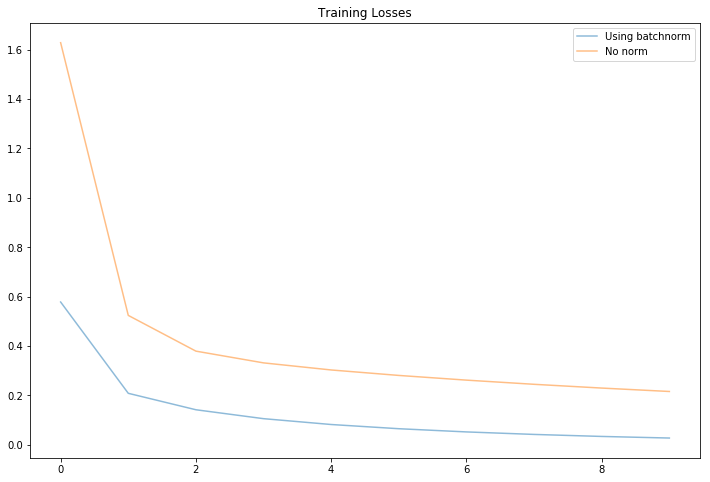

In [9]:
# compare
fig, ax = plt.subplots(figsize=(12,8))
#losses_batchnorm = np.array(losses_batchnorm)
#losses_no_norm = np.array(losses_no_norm)
plt.plot(losses_batchnorm, label='Using batchnorm', alpha=0.5)
plt.plot(losses_no_norm, label='No norm', alpha=0.5)
plt.title("Training Losses")
plt.legend()

---
## Testing

You should see that the model with batch normalization, starts off with a lower training loss and, over ten epochs of training, gets to a training loss that is noticeably lower than our model without normalization.

Next, let's see how both these models perform on our test data! Below, we have a function `test` that takes in a model and a parameter `train` (True or False) which indicates whether the model should be in training or evaulation mode. This is for comparison purposes, later. This function will calculate some test statistics including the overall test accuracy of a passed in model.


In [10]:
def test(model, train):
    # initialize vars to monitor test loss and accuracy
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    test_loss = 0.0

    # set model to train or evaluation mode
    # just to see the difference in behavior
    if(train==True):
        model.train()
    if(train==False):
        model.eval()
    
    # loss criterion
    criterion = nn.CrossEntropyLoss()
    
    for batch_idx, (data, target) in enumerate(test_loader):
        batch_size = data.size(0)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss += loss.item()*batch_size
        # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)
        # compare predictions to true label
        correct = np.squeeze(pred.eq(target.data.view_as(pred)))
        # calculate test accuracy for each object class
        for i in range(batch_size):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    print('Test Loss: {:.6f}\n'.format(test_loss/len(test_loader.dataset)))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

### Training and Evaluation Mode

Setting a model to evaluation mode is important for models with batch normalization layers!

>* Training mode means that the batch normalization layers will use **batch** statistics to calculate the batch norm. 
* Evaluation mode, on the other hand, uses the estimated **population** mean and variance from the entire training set, which should give us increased performance on this test data! 

In [11]:
# test batchnorm case, in *train* mode
test(net_batchnorm, train=True)

Test Loss: 0.086881

Test Accuracy of     0: 98% (967/980)
Test Accuracy of     1: 99% (1126/1135)
Test Accuracy of     2: 96% (999/1032)
Test Accuracy of     3: 97% (989/1010)
Test Accuracy of     4: 96% (952/982)
Test Accuracy of     5: 96% (864/892)
Test Accuracy of     6: 97% (933/958)
Test Accuracy of     7: 96% (990/1028)
Test Accuracy of     8: 96% (939/974)
Test Accuracy of     9: 95% (966/1009)

Test Accuracy (Overall): 97% (9725/10000)


In [12]:
# test batchnorm case, in *evaluation* mode
test(net_batchnorm, train=False)

Test Loss: 0.073484

Test Accuracy of     0: 98% (968/980)
Test Accuracy of     1: 99% (1127/1135)
Test Accuracy of     2: 97% (1005/1032)
Test Accuracy of     3: 98% (991/1010)
Test Accuracy of     4: 97% (955/982)
Test Accuracy of     5: 97% (874/892)
Test Accuracy of     6: 97% (932/958)
Test Accuracy of     7: 96% (995/1028)
Test Accuracy of     8: 96% (940/974)
Test Accuracy of     9: 97% (983/1009)

Test Accuracy (Overall): 97% (9770/10000)


In [13]:
# for posterity, test no norm case in eval mode
test(net_no_norm, train=False)

Test Loss: 0.207286

Test Accuracy of     0: 98% (963/980)
Test Accuracy of     1: 98% (1113/1135)
Test Accuracy of     2: 91% (943/1032)
Test Accuracy of     3: 93% (943/1010)
Test Accuracy of     4: 93% (918/982)
Test Accuracy of     5: 92% (824/892)
Test Accuracy of     6: 95% (912/958)
Test Accuracy of     7: 92% (954/1028)
Test Accuracy of     8: 91% (891/974)
Test Accuracy of     9: 93% (940/1009)

Test Accuracy (Overall): 94% (9401/10000)


### Which model has the highest accuracy?

You should see a small improvement whe comparing the batch norm model's accuracy in training and evaluation mode; **evaluation mode** should give a small improvement!

You should also see that the model that uses batch norm layers shows a marked improvement in overall accuracy when compared with the no-normalization model.

---
# Considerations for other network types

This notebook demonstrates batch normalization in a standard neural network with fully connected layers. You can also use batch normalization in other types of networks, but there are some special considerations.

### ConvNets

Convolution layers consist of multiple feature maps. (Remember, the depth of a convolutional layer refers to its number of feature maps.) And the weights for each feature map are shared across all the inputs that feed into the layer. Because of these differences, batch normalizing convolutional layers requires batch/population mean and variance per feature map rather than per node in the layer.

> To apply batch normalization on the outputs of convolutional layers, we use [BatchNorm2d](https://pytorch.org/docs/stable/nn.html#batchnorm2d)


### RNNs

Batch normalization can work with recurrent neural networks, too, as shown in the 2016 paper [Recurrent Batch Normalization](https://arxiv.org/abs/1603.09025). It's a bit more work to implement, but basically involves calculating the means and variances per time step instead of per layer. You can find an example where someone implemented recurrent batch normalization in PyTorch, in [this GitHub repo](https://github.com/jihunchoi/recurrent-batch-normalization-pytorch).